<a href="https://colab.research.google.com/github/nebyu08/data_sc/blob/main/markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# create state space and initial state probabilities
states = ['sleeping', 'eating', 'barking']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

sleeping    0.35
eating      0.35
barking     0.30
Name: states, dtype: float64
1.0


In [2]:
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

         sleeping eating barking
sleeping      0.4    0.2     0.4
eating       0.45   0.45     0.1
barking      0.45   0.25     0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

sleeping    1.0
eating      1.0
barking     1.0
dtype: float64


In [30]:
ed={}
type(ed)

dict

In [5]:
from pprint import pprint

# create a function that maps transition probability dataframe
# to markov edges and weights

def _get_markov_edges(Q):
  edges = {}
  for col in Q.columns:
    for idx in Q.index:
      edges[(idx,col)] = Q.loc[idx,col]
  return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('barking', 'barking'): 0.3,
 ('barking', 'eating'): 0.25,
 ('barking', 'sleeping'): 0.45,
 ('eating', 'barking'): 0.1,
 ('eating', 'eating'): 0.45,
 ('eating', 'sleeping'): 0.45,
 ('sleeping', 'barking'): 0.4,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'sleeping'): 0.4}


In [39]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
  tmp_origin, tmp_destination = k[0], k[1]
  G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
print(G.edges(data=True))
#pos = nx.spring_layout(G)

Nodes:
['sleeping', 'eating', 'barking']

Edges:
[('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'barking', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('eating', 'eating', {'weight': 0.45, 'label': 0.45}), ('eating', 'barking', {'weight': 0.1, 'label': 0.1}), ('barking', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('barking', 'eating', {'weight': 0.25, 'label': 0.25}), ('barking', 'barking', {'weight': 0.3, 'label': 0.3})]


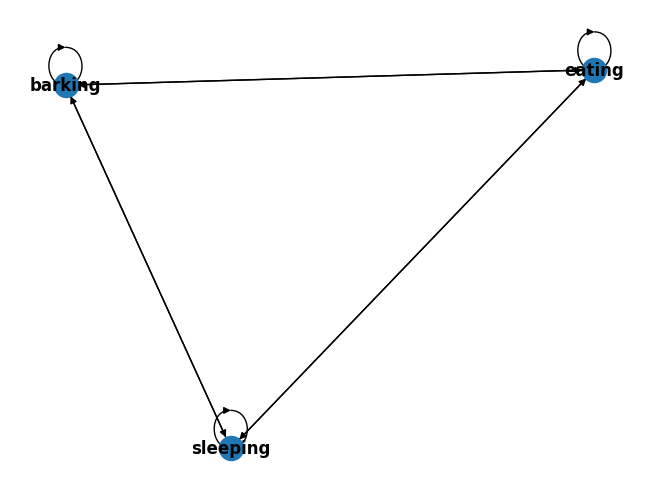

In [41]:
nx.draw(G,with_labels=True,font_weight="bold")
#plt.savefig("lab1.png",format="PNG")

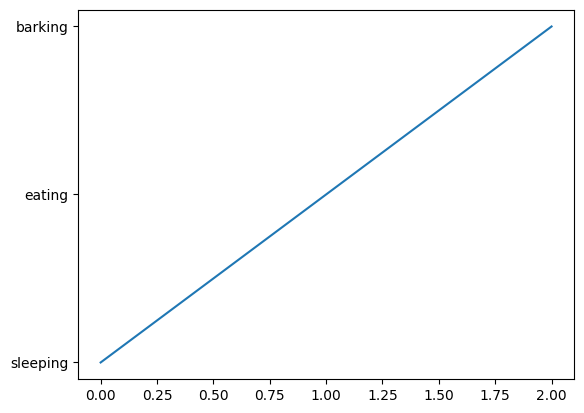

In [8]:
plt.plot(G)

# Case 2

In [10]:
hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

healthy    0.5
sick       0.5
Name: states, dtype: float64

 1.0


In [11]:
# create hidden transition matrix
# a or alpha
# = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

        healthy sick
healthy     0.7  0.3
sick        0.4  0.6

 [[0.7 0.3]
 [0.4 0.6]] (2, 2) 

healthy    1.0
sick       1.0
dtype: float64


In [12]:
# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')

        sleeping eating barking
healthy      0.2    0.6     0.2
sick         0.4    0.1     0.5

 [[0.2 0.6 0.2]
 [0.4 0.1 0.5]] (2, 3) 



In [13]:
# create graph edges and weights

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('healthy', 'healthy'): 0.7,
 ('healthy', 'sick'): 0.3,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}
{('healthy', 'barking'): 0.2,
 ('healthy', 'eating'): 0.6,
 ('healthy', 'sleeping'): 0.2,
 ('sick', 'barking'): 0.5,
 ('sick', 'eating'): 0.1,
 ('sick', 'sleeping'): 0.4}


In [24]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():

  tmp_origin, tmp_destination = k[0], k[1]
  G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
  tmp_origin, tmp_destination = k[0], k[1]
  G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

print(f'Edges:')
pprint(G.edges(data=True))

Nodes:
['healthy', 'sick']

Edges:
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.7, 'label': 0.7}), ('healthy', 'sick', {'weight': 0.3, 'label': 0.3}), ('healthy', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('healthy', 'eating', {'weight': 0.6, 'label': 0.6}), ('healthy', 'barking', {'weight': 0.2, 'label': 0.2}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6}), ('sick', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sick', 'eating', {'weight': 0.1, 'label': 0.1}), ('sick', 'barking', {'weight': 0.5, 'label': 0.5})])


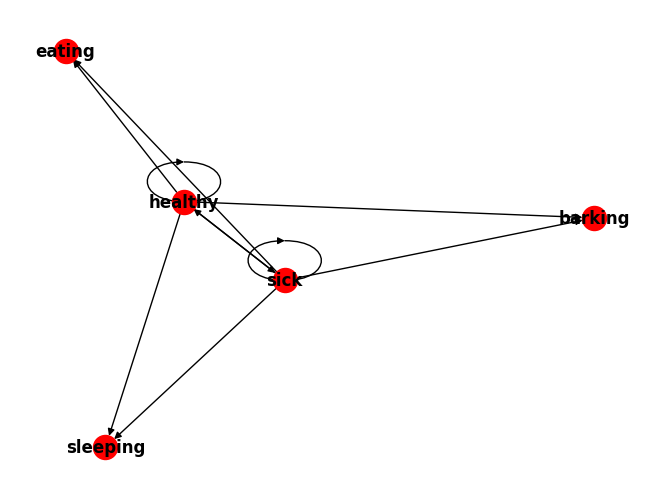

In [27]:
nx.draw(G,with_labels=True,font_weight="bold",node_shape="o",node_color="r")

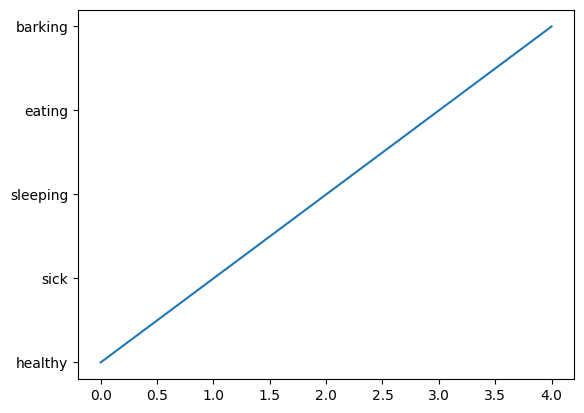

In [19]:
plt.plot(G)